In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from google.colab import files

files.upload()

{}

In [ ]:
pokemon = pd.read_csv("pokemon_data.csv")
pokemon = pokemon.fillna("none")

In [ ]:
def get_num_from_gen(gen, n, type):
  temp = pokemon[pokemon["generation"] == gen]
  total_num = temp['name'].count()
  temp = temp[temp["type" + str(n)] == type]
  return round(temp['name'].count()/total_num,3)


types = pokemon["type2"].unique()
generations = pokemon["generation"].unique()


In [ ]:
by_generation = {'generation' : generations}


for type_name in types:
  type1, type2 = [], [] 
  for gen in generations:
    type1.append(get_num_from_gen(gen, 1, type_name))
    type2.append(get_num_from_gen(gen, 2, type_name))
  by_generation[type_name + "_1"] = type1
  by_generation[type_name + "_2"] = type2

by_generation = pd.DataFrame(by_generation)


In [ ]:
by_generation

,generation,poison_1,poison_2,none_1,none_2,flying_1,flying_2,dark_1,dark_2,electric_1,...,water_1,water_2,dragon_1,dragon_2,ghost_1,ghost_2,bug_1,bug_2,normal_1,normal_2
0,1,0.093,0.139,0.0,0.464,0.000,0.126,0.000,0.026,0.060,...,0.185,0.026,0.020,0.000,0.020,0.000,0.079,0.000,0.146,0.000
1,2,0.010,0.030,0.0,0.510,0.000,0.190,0.050,0.010,0.060,...,0.180,0.000,0.000,0.010,0.010,0.000,0.100,0.000,0.150,0.000
2,3,0.022,0.015,0.0,0.511,0.000,0.089,0.030,0.044,0.030,...,0.178,0.030,0.052,0.015,0.030,0.015,0.089,0.015,0.133,0.000
3,4,0.056,0.019,0.0,0.495,0.000,0.131,0.028,0.037,0.065,...,0.121,0.009,0.028,0.028,0.056,0.019,0.075,0.009,0.159,0.000
4,5,0.013,0.032,0.0,0.519,0.006,0.109,0.083,0.019,0.045,...,0.109,0.000,0.045,0.019,0.032,0.026,0.115,0.000,0.109,0.000
5,6,0.028,0.000,0.0,0.431,0.028,0.083,0.042,0.028,0.042,...,0.069,0.056,0.056,0.069,0.056,0.056,0.042,0.000,0.056,0.056


Text(0.5, 1.0, 'Secondary Type')

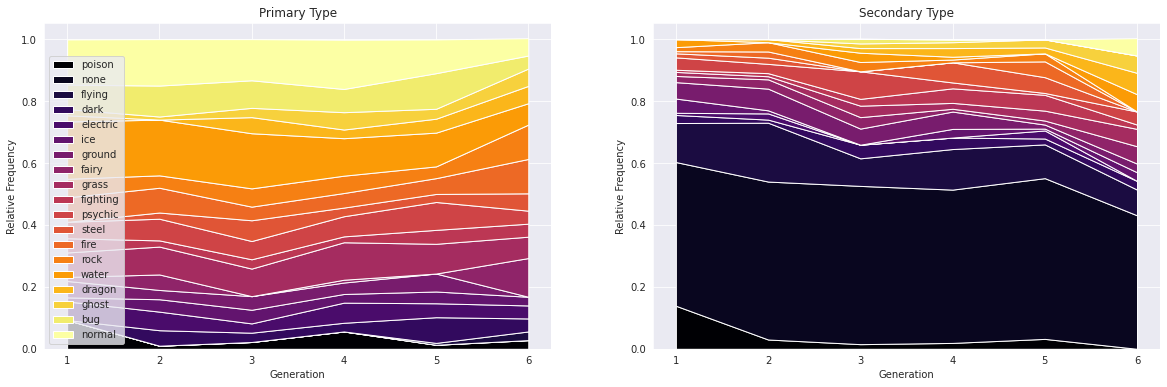

In [ ]:
X = by_generation['generation']
Y1, Y2 = [], []
for type_name in types:
  Y1.append(by_generation[type_name + "_1"])
  Y2.append(by_generation[type_name + "_2"])

%matplotlib inline 
sn.set_style("darkgrid")
  
colors = plt.cm.inferno(np.linspace(0, 1, 19))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.stackplot(X, Y1, labels = types, colors = colors)
plt.xlabel("Generation")
plt.ylabel("Relative Frequency")
plt.title("Primary Type")
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.stackplot(X, Y2, labels = types, colors = colors)
plt.xlabel("Generation")
plt.ylabel("Relative Frequency")
plt.title("Secondary Type")


Notice that the relative frequencies of many primary or secondary types are very dependent on the generation. For example the fairy type was only introduced in generation 6, the dark type was only introduced in generation 2.

On the otherhand, the relative frequency of single type pokemon is going down. Pokemon with only a primary type will have "none" as their secondary type in this dataset, and as we can see, the amount of those pokemon has decreased from 60% in the first generation to about 40% in the 6th.

We can also see that some types like normal type, were only present as a primary type up until the 6th generation.

So it is critical to randomize during the train-test split. If we don't and only take the first 500 pokemon, then we will necessarily be biasing our data based on these graphs.

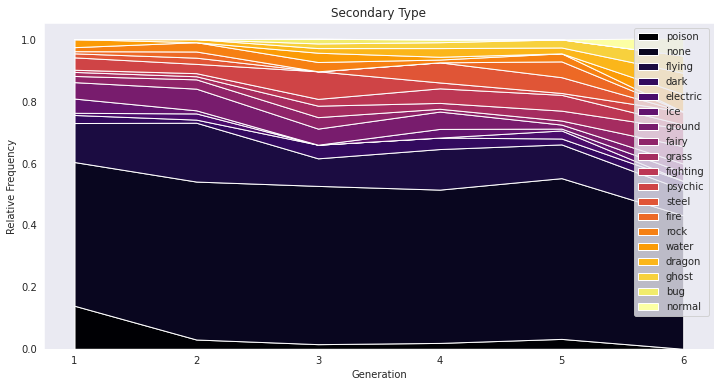